In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

#processing and loading the data

In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
selected_columns = [
    'Daytime/evening attendance', 'Mother\'s occupation', 'Father\'s occupation',
    'Gender', 'Displaced', 'Educational special needs', 'Target'
]
dataset = dataset[selected_columns]

In [ ]:
label_encoder = LabelEncoder()
for col in selected_columns[:-1]:  # Skip 'Target' column during encoding
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [ ]:
X, y = make_classification(n_samples=1000, n_features=7, random_state=42)

# splitting the data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

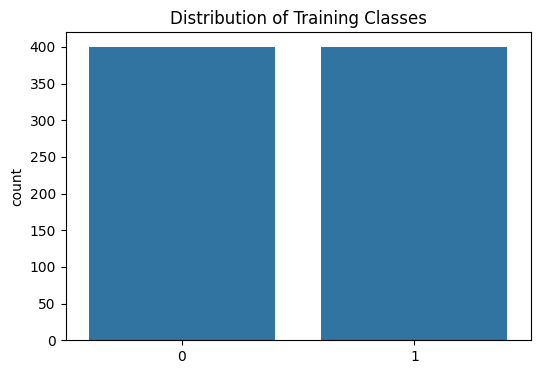

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Training Classes')
plt.show()

# Simple model

In [ ]:
basic_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
basic_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

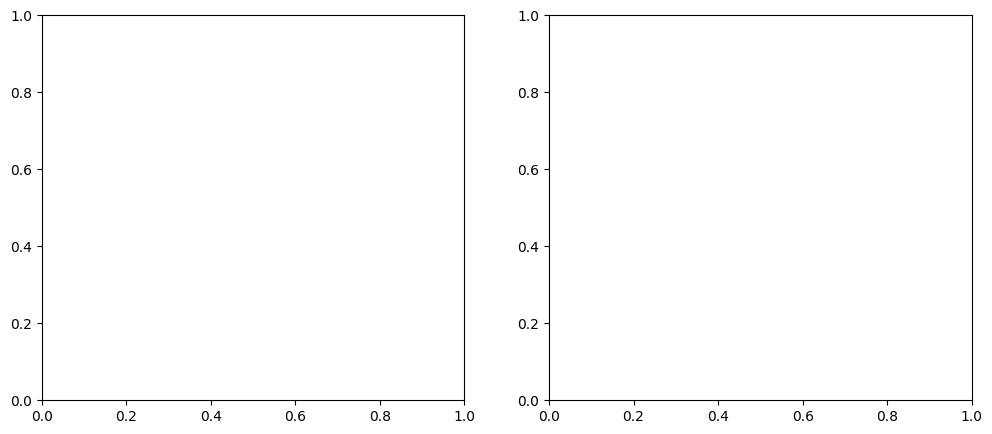

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

In [32]:
ax1.plot(basic_history.history['accuracy'], label='Train Accuracy')
ax1.plot(basic_history.history['val_accuracy'], label='Val Accuracy')

In [33]:
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# compile the optimized model

In [ ]:
optimized_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
optimized_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
basic_history = basic_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5797 - loss: 0.6742 - val_accuracy: 0.8100 - val_loss: 0.5154
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.4572 - val_accuracy: 0.8400 - val_loss: 0.3993
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8910 - loss: 0.3494 - val_accuracy: 0.8400 - val_loss: 0.3480
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 0.3332 - val_accuracy: 0.8550 - val_loss: 0.3287
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3260 - val_accuracy: 0.8500 - val_loss: 0.3213
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3215 - val_accuracy: 0.8450 - val_loss: 0.3189
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.2949 - val_accuracy: 0.8350 - val_loss: 0.3189
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8876 - loss: 0.2775 - val_accuracy: 0.8450 - val_loss

In [ ]:
optimized_history = optimized_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4759 - loss: 1.3752 - val_accuracy: 0.6300 - val_loss: 1.1342
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 1.1236 - val_accuracy: 0.8200 - val_loss: 0.9899
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7228 - loss: 0.9989 - val_accuracy: 0.8350 - val_loss: 0.8792
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.9072 - val_accuracy: 0.8550 - val_loss: 0.7849
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.8275 - val_accuracy: 0.8500 - val_loss: 0.7158
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 0.7740 - val_accuracy: 0.8500 - val_loss: 0.6633
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8599 - loss: 0.6913 - val_accuracy: 0.8500 - val_loss: 0.6199
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.6491 - val_accuracy: 0.8550 - val_loss

In [ ]:
basic_eval = basic_model.evaluate(X_test, y_test, verbose=1)
optimized_eval = optimized_model.evaluate(X_test, y_test, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9095 - loss: 0.2541 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.3958 


In [ ]:
print(f"Basic Model - Loss: {basic_eval[0]}, Accuracy: {basic_eval[1]}")
print(f"Optimized Model - Loss: {optimized_eval[0]}, Accuracy: {optimized_eval[1]}")

Basic Model - Loss: 0.29208195209503174, Accuracy: 0.8849999904632568
Optimized Model - Loss: 0.43297845125198364, Accuracy: 0.8899999856948853


In [ ]:
y_pred = (basic_model.predict(X_test) > 0.5).astype("int32")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[84  8]
 [15 93]]


In [ ]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        92
           1       0.92      0.86      0.89       108

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
misclassified = np.where(y_test != y_pred.flatten())[0]
print(f"\nNumber of Misclassified Samples: {len(misclassified)}")
print(f"Indices of Misclassified Samples: {misclassified}")


Number of Misclassified Samples: 23
Indices of Misclassified Samples: [ 19  57  73  75  77  79  92  98  99 103 105 115 117 119 121 122 142 153
 155 164 166 174 193]


# Saving the simple model

In [ ]:
os.makedirs('saved_models', exist_ok=True)

In [34]:
basic_model.save('saved_models/basic_model.h5')
optimized_model.save('saved_models/optimized_model.h5')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
